In [456]:
#importación de librerias

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.datasets import make_classification

In [457]:
# Carga del dataset
df = pd.read_csv('weatherAUS.csv')

# Ver primeras filas
print(df.head())

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7    

In [458]:
print("Ubicaciones únicas:", sorted(df['Location'].unique()))
print("Cantidad de ubicaciones únicas:", df['Location'].nunique())

Ubicaciones únicas: ['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek', 'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar', 'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart', 'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport', 'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle', 'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF', 'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale', 'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville', 'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia', 'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera']
Cantidad de ubicaciones únicas: 49


In [459]:
print(df['Location'].value_counts())

Location
Canberra            3436
Sydney              3344
Adelaide            3193
Darwin              3193
Hobart              3193
Perth               3193
Melbourne           3193
Brisbane            3193
Albury              3040
MountGinini         3040
GoldCoast           3040
Wollongong          3040
MountGambier        3040
Launceston          3040
AliceSprings        3040
Albany              3040
Townsville          3040
Bendigo             3040
Cairns              3040
Ballarat            3040
Penrith             3039
Newcastle           3039
Tuggeranong         3039
PerthAirport        3009
Williamtown         3009
Cobar               3009
BadgerysCreek       3009
SydneyAirport       3009
Richmond            3009
Moree               3009
CoffsHarbour        3009
NorfolkIsland       3009
WaggaWagga          3009
Witchcliffe         3009
Watsonia            3009
Dartmoor            3009
Portland            3009
Sale                3009
MelbourneAirport    3009
Mildura         

In [460]:
# Dimensiones
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

# Información general y resumen estadístico
df.info()
print(df.describe(include='all'))

Filas: 145460, Columnas: 23
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  C

In [461]:
# Valores nulos por columna
print(df.isnull().sum())

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


In [462]:
# Se lee dataset con coordenadas y se mergea para asociar cada ciudad a su lat y long
df_coords = pd.read_csv('weatherAUS-geo-coordinates.csv')  # Asegúrate del nombre correcto del archivo

df = df.merge(df_coords, left_on='Location', right_on='city', how='left')
df = df.drop(columns=['city'])
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,latitude,longitude
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,-36.080780,146.916473
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,-36.080780,146.916473
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,-36.080780,146.916473
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,-36.080780,146.916473
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,-36.080780,146.916473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,-24.485318,130.928669
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,-24.485318,130.928669
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,-24.485318,130.928669
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,-24.485318,130.928669


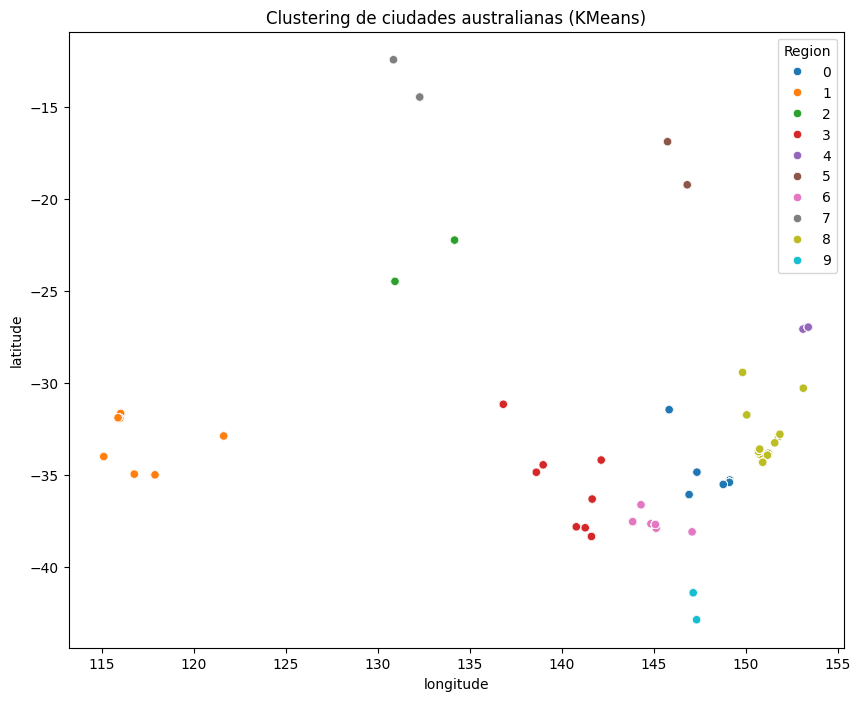

In [463]:
from sklearn.cluster import KMeans

X = df[['latitude', 'longitude']]
n_clusters = 10  # Elige el número según lo que observes en el gráfico
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Region'] = kmeans.fit_predict(X)

# Visualización
plt.figure(figsize=(10,8))
sns.scatterplot(x='longitude', y='latitude', hue='Region', data=df, palette='tab10')
plt.title('Clustering de ciudades australianas (KMeans)')
plt.show()

In [464]:
# Para poder imputar mejor los nan, creamos la variable Season ya que las variables meteorológicas tienen patrones estacionales
df['Date'] = pd.to_datetime(df['Date'])

def get_season(dt):
    month = dt.month
    # Estaciones para el hemisferio sur
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    elif month in [9, 10, 11]:
        return 'Spring'

df['Season'] = df['Date'].apply(get_season)

In [465]:
def chequear_consistencia_lluvia(df):
    """
    Verifica la consistencia entre las columnas 'RainTomorrow' y 'RainToday'
    del día siguiente en un DataFrame de pronóstico de lluvia.

    Args:
        df (pd.DataFrame): El DataFrame que contiene las columnas
                           'Location', 'Date', 'RainToday', y 'RainTomorrow'.

    Returns:
        tuple: (total, coincidencias, no_coincidencias, porcentaje) del análisis.
    """
    
    # 1. Asegurar que 'Date' sea datetime y ordenar por Location y Date
    df_temp = df.copy()
    if not pd.api.types.is_datetime64_any_dtype(df_temp['Date']):
        df_temp['Date'] = pd.to_datetime(df_temp['Date'])
        
    df_sorted = df_temp.sort_values(['Location', 'Date'])

    # 2. Obtener los valores del día siguiente
    # shift(-1) mueve los valores de la columna al registro anterior (el día siguiente)
    df_sorted['RainToday_next'] = df_sorted.groupby('Location')['RainToday'].shift(-1)
    df_sorted['Date_next'] = df_sorted.groupby('Location')['Date'].shift(-1)

    # 3. Filtrar solo los días consecutivos
    df_sorted['Date_diff'] = (df_sorted['Date_next'] - df_sorted['Date']).dt.days
    df_consistent = df_sorted[df_sorted['Date_diff'] == 1].copy()

    # 4. Chequear la Consistencia
    # Compara: RainTomorrow (del día actual) == RainToday_next (del día siguiente)
    # Se usa .copy() para evitar SettingWithCopyWarning, ya que filtramos antes.
    df_consistent.loc[:, 'Consistencia'] = df_consistent['RainTomorrow'] == df_consistent['RainToday_next']

    # 5. Calcular Métricas
    total = len(df_consistent)
    
    # Sumar los valores True (1) para obtener las coincidencias
    coinciden = df_consistent['Consistencia'].sum()
    no_coinciden = total - coinciden
    
    # Manejar división por cero si total es 0
    porcentaje = coinciden / total if total > 0 else 0.0

    # 6. Imprimir Resultados
    print(f"--- Análisis de Consistencia para {total} días consecutivos ---")
    print(f"Total checks: {total}")
    print(f"Coincidencias (RainTomorrow == RainToday siguiente día): {coinciden}")
    print(f"No coincidencias: {no_coinciden}")
    print(f"Porcentaje de coincidencia: {porcentaje:.2%}")
    print("-" * 50)
    
    return

In [466]:
chequear_consistencia_lluvia(df)

--- Análisis de Consistencia para 145268 días consecutivos ---
Total checks: 145268
Coincidencias (RainTomorrow == RainToday siguiente día): 142017
No coincidencias: 3251
Porcentaje de coincidencia: 97.76%
--------------------------------------------------


In [467]:
rains = ['RainToday', 'RainTomorrow']
for var in rains:
    grouped_mode = df.groupby(['Region', 'Date'])[var].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    df.loc[df[var].isnull(), var] = grouped_mode[df[var].isnull()]

In [468]:
chequear_consistencia_lluvia(df)

--- Análisis de Consistencia para 145268 días consecutivos ---
Total checks: 145268
Coincidencias (RainTomorrow == RainToday siguiente día): 145245
No coincidencias: 23
Porcentaje de coincidencia: 99.98%
--------------------------------------------------


In [469]:
# Contar NAN RainToday y RainTomorrow
nulos_rain = df[rains].isnull().sum()
print("Nulos en RainToday y RainTomorrow después de la imputación:")
print(nulos_rain)


Nulos en RainToday y RainTomorrow después de la imputación:
RainToday       23
RainTomorrow    27
dtype: int64


In [470]:
# Se dropean NAN de rainToday y RainTomorrow
df = df.dropna(subset=rains)

In [471]:
chequear_consistencia_lluvia(df)

--- Análisis de Consistencia para 145207 días consecutivos ---
Total checks: 145207
Coincidencias (RainTomorrow == RainToday siguiente día): 145207
No coincidencias: 0
Porcentaje de coincidencia: 100.00%
--------------------------------------------------


In [472]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)


In [473]:
# Lista de variables a contar nulos
variables_numericas = [
    'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
    'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
    'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
    'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'
]

# Contar nulos en cada variable
nulos_train = df_train[variables_numericas].isnull().sum()
nulos_test = df_train[variables_numericas].isnull().sum()
print("Nulos en df_train antes de la imputación:")
print(nulos_train)
print()
print("Nulos en df_test antes de la imputación:")
print(nulos_test)

Nulos en df_train antes de la imputación:
MinTemp           1187
MaxTemp           1007
Rainfall          2590
Evaporation      50350
Sunshine         55930
WindGustSpeed     8201
WindSpeed9am      1401
WindSpeed3pm      2462
Humidity9am       2134
Humidity3pm       3634
Pressure9am      12072
Pressure3pm      12045
Cloud9am         44787
Cloud3pm         47600
Temp9am           1415
Temp3pm           2915
dtype: int64

Nulos en df_test antes de la imputación:
MinTemp           1187
MaxTemp           1007
Rainfall          2590
Evaporation      50350
Sunshine         55930
WindGustSpeed     8201
WindSpeed9am      1401
WindSpeed3pm      2462
Humidity9am       2134
Humidity3pm       3634
Pressure9am      12072
Pressure3pm      12045
Cloud9am         44787
Cloud3pm         47600
Temp9am           1415
Temp3pm           2915
dtype: int64


In [474]:
# Imputacion de nan en variables numéricas por la mediana del mismo día y región
# Utilizamos la mediana ya que los datos meteorológicos suelen presentar distribuciones asimétricas y eventos extremos que afectan la media
#for var in variables_numericas:
#    grouped_median = df_train.groupby(['Region', 'Date'])[var].transform('median')
#    df_train.loc[df_train[var].isnull(), var] = grouped_median[df_train[var].isnull()]
for var in variables_numericas:
    # ----------------------------------------------------
    # A. Cálculo y Aplicación en df_train (CON Data Leakage permitido)
    #    Aquí se usa transform() que calcula la mediana y la aplica al mismo df.
    # ----------------------------------------------------
    
    # 1. Calcular medianas agrupadas en df_train
    grouped_median_train = df_train.groupby(['Region', 'Date'])[var].transform('median')
    
    # 2. Aplicar a NaNs en df_train
    df_train.loc[df_train[var].isnull(), var] = grouped_median_train[df_train[var].isnull()]

    
    # ----------------------------------------------------
    # B. Aplicación en df_test (SIN Data Leakage)
    # ----------------------------------------------------
    
    # 1. Recalcular las medianas de df_train como un mapa (Series)
    #    NOTA: grouped_median_train SÓLO debe calcularse en df_train.
    median_map_train = df_train.groupby(['Region', 'Date'])[var].median()
    
    # 2. Crear la serie de valores de imputación para df_test
    #    Mapeamos los índices (Region, Date) de df_test al mapa de medianas de df_train.
    impute_values_test = df_test.set_index(['Region', 'Date']).index.map(median_map_train)
    
    # 3. Aplicar la imputación SOLAMENTE a los NaNs en df_test
    df_test.loc[df_test[var].isnull(), var] = impute_values_test.values[df_test[var].isnull()]

In [475]:
# Contar nulos en cada variable
nulos_train = df_train[variables_numericas].isnull().sum()
nulos_test = df_test[variables_numericas].isnull().sum()
print("Nulos en df_train después de la primera imputación:")
print(nulos_train)
print()
print("Nulos en df_test después de la primera imputación:")
print(nulos_test)

Nulos en df_train después de la primera imputación:
MinTemp            13
MaxTemp            13
Rainfall           33
Evaporation      2938
Sunshine         6712
WindGustSpeed     362
WindSpeed9am       14
WindSpeed3pm       14
Humidity9am        26
Humidity3pm       140
Pressure9am       201
Pressure3pm       202
Cloud9am         4129
Cloud3pm         4398
Temp9am             9
Temp3pm           116
dtype: int64

Nulos en df_test después de la primera imputación:
MinTemp             3
MaxTemp             0
Rainfall            6
Evaporation       692
Sunshine         1614
WindGustSpeed     100
WindSpeed9am        3
WindSpeed3pm        5
Humidity9am         3
Humidity3pm        34
Pressure9am        42
Pressure3pm        44
Cloud9am         1061
Cloud3pm         1067
Temp9am             2
Temp3pm            27
dtype: int64


In [476]:
# Imputación por mediana de Región segun la season para los nan que sigue habiendo
#for var in variables_numericas:
#    grouped_region_season_median = df.groupby(['Region', 'Season'])[var].transform('median')
#    df_train.loc[df_train[var].isnull(), var] = grouped_region_season_median[df_train[var].isnull()]

for var in variables_numericas:
    # ----------------------------------------------------
    # A. Cálculo y Aplicación en df_train
    # ----------------------------------------------------
    
    # 1. Calcular medianas agrupadas en df_train
    grouped_region_season_median_train = df_train.groupby(['Region', 'Season'])[var].transform('median')
    
    # 2. Aplicar a NaNs en df_train (imputando los NaNs que quedaron del bucle anterior)
    df_train.loc[df_train[var].isnull(), var] = grouped_region_season_median_train[df_train[var].isnull()]
    
    
    # ----------------------------------------------------
    # B. Aplicación en df_test (SIN Data Leakage)
    # ----------------------------------------------------
    
    # 1. Recalcular las medianas de df_train como un mapa (Series)
    median_map_train = df_train.groupby(['Region', 'Season'])[var].median()
    
    # 2. Crear la serie de valores de imputación para df_test
    impute_values_test = df_test.set_index(['Region', 'Season']).index.map(median_map_train)
    
    # 3. Aplicar la imputación SOLAMENTE a los NaNs en df_test
    df_test.loc[df_test[var].isnull(), var] = impute_values_test.values[df_test[var].isnull()]

In [477]:
# Contar nulos en cada variable
nulos_train = df_train[variables_numericas].isnull().sum()
nulos_test = df_test[variables_numericas].isnull().sum()
print("Nulos en df_train después de la segunda imputación:")
print(nulos_train)
print()
print("Nulos en df_test después de la segunda imputación:")
print(nulos_test)


Nulos en df_train después de la segunda imputación:
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

Nulos en df_test después de la segunda imputación:
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64


In [478]:
# Lista de variables categoricas a contar nulos
variables_categoricas = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

# Contar nulos en cada variable
nulos_train = df_train[variables_categoricas].isnull().sum()
nulos_test = df_test[variables_categoricas].isnull().sum()
print("Nulos en df_train")
print(nulos_train)
print()
print("Nulos en df_test")
print(nulos_test)

Nulos en df_train
WindGustDir    8251
WindDir9am     8433
WindDir3pm     3394
dtype: int64

Nulos en df_test
WindGustDir    2067
WindDir9am     2132
WindDir3pm      832
dtype: int64


In [479]:
# Imputacion de nan de variables categoricas por la Moda (ya que nos parece mas adecuado para las cat) del mismo día y región
#for var in variables_categoricas:
#    grouped_mode = df.groupby(['Region', 'Date'])[var].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
#    df.loc[df[var].isnull(), var] = grouped_mode[df[var].isnull()]

for var in variables_categoricas:
    
    # ----------------------------------------------------
    # 1. CÁLCULO Y APLICACIÓN en df_train
    # ----------------------------------------------------
    
    # Calcular la moda agrupada y aplicarla a df_train (transform)
    # Nota: Usamos el df_train para calcular y aplicar.
    grouped_mode_train = df_train.groupby(['Region', 'Date'])[var].transform(
        lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
    )
    
    # Aplicar la moda a los NaNs en df_train
    df_train.loc[df_train[var].isnull(), var] = grouped_mode_train[df_train[var].isnull()]
    
    
    # ----------------------------------------------------
    # 2. APLICACIÓN en df_test (SIN Fuga de Datos - Data Leakage)
    # ----------------------------------------------------
    
    # a. Recalcular la moda de df_train como un MAPA (Serie Multi-índice)
    #    Esta es la información que se usará para la imputación de test.
    mode_map_train = df_train.groupby(['Region', 'Date'])[var].apply(
        lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
    )
    
    # b. Crear la serie de valores de imputación para df_test
    #    Mapeamos los índices (Region, Date) de df_test al mapa de modas de df_train.
    impute_values_test = df_test.set_index(['Region', 'Date']).index.map(mode_map_train)
    
    # c. Aplicar la imputación SOLAMENTE a los NaNs en df_test
    df_test.loc[df_test[var].isnull(), var] = impute_values_test.values[df_test[var].isnull()]

In [480]:
# Contar nulos en cada variable
nulos_train = df_train[variables_categoricas].isnull().sum()
nulos_test = df_test[variables_categoricas].isnull().sum()
print("Nulos en df_train después de la primera imputación:")
print(nulos_train)
print()
print("Nulos en df_test después de la primera imputación:")
print(nulos_test)

Nulos en df_train después de la primera imputación:
WindGustDir    365
WindDir9am     317
WindDir3pm      35
dtype: int64

Nulos en df_test después de la primera imputación:
WindGustDir    102
WindDir9am      96
WindDir3pm      10
dtype: int64


In [481]:
# Se eliminan los restantes ya que consideramos que si aplicamos la misma logica que venimos teniendo, la moda alteraría de manera negativa el df
df_train = df_train.dropna(subset=variables_categoricas)
df_test = df_test.dropna(subset=variables_categoricas)

In [482]:
# Valores nulos por columna
print("Valores nulos en df_train")
print(df_train.isnull().sum())
print()
print("Valores nulos en df_test")
print(df_test.isnull().sum())

Valores nulos en df_train
Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
latitude         0
longitude        0
Region           0
Season           0
dtype: int64

Valores nulos en df_test
Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Rain

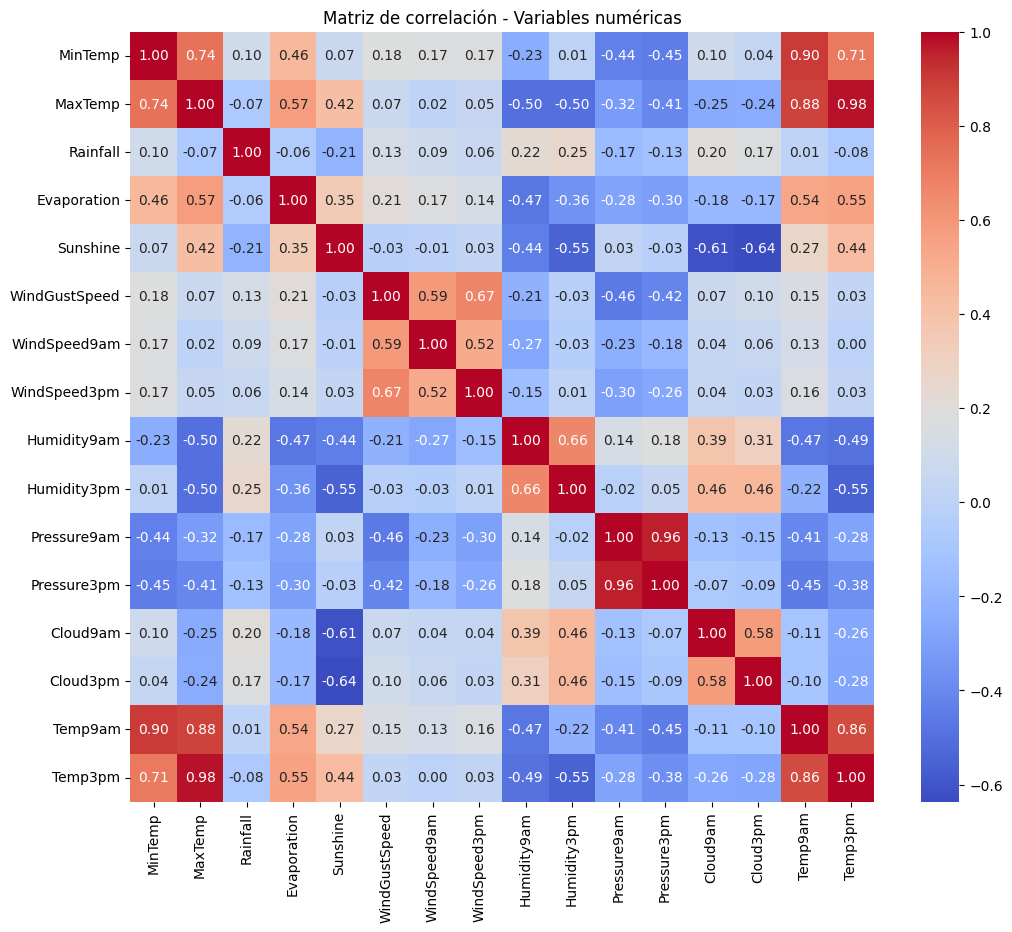

In [483]:
# Analizamos la matriz de correlación entre las variables numéricas
variables_numericas = [
    'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
    'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
    'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
    'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'
]

corr_matrix = df_train[variables_numericas].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación - Variables numéricas')
plt.show()

In [487]:
print(df_train['RainTomorrow'].unique())
print()
print(df_train['RainTomorrow'].value_counts())

['Yes' 'No']

RainTomorrow
No     89717
Yes    25924
Name: count, dtype: int64


El conjunto de datos está desbalanceado en la variable RainTomorrow:
La clase "No" tiene 89717 registros, mientras que la clase "Yes" solo 25924.
Esto significa que la mayoría de los días no llueve, lo cual puede afectar el desempeño de los modelos de clasificación.

In [ ]:
# Crear variables dummies para la columna 'Region'
df_train = pd.get_dummies(df_train, columns=['Region'], prefix='Region')
df_test = pd.get_dummies(df_test, columns=['Region'], prefix='Region')

        Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1 2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2 2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3 2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4 2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Cloud9am  Cloud3pm  Temp9am  \
0           W           44.0          W  ...      8.0       NaN     16.9   
1         WNW           44.0        NNW  ...      NaN       NaN     17.2   
2         WSW           46.0          W  ...      NaN       2.0     21.0   
3          NE           24.0         SE  ...      NaN       NaN     18.1   
4           W           41.0        ENE  ...      7.0       8.0     17.8   

   Temp3pm  RainToday  RainTomorrow  latitude   longitude  Region  Season  
0     21.8

In [489]:
df_train.drop(columns=['Location','latitude', 'longitude','Date'], inplace=True)
df_test.drop(columns=['Location','latitude', 'longitude','Date'], inplace=True)

In [490]:
# Creamos dummies para las variables categoricas indicadas
columnas_dummies = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow','Season']

df_train = pd.get_dummies(df_train, columns=columnas_dummies, prefix=columnas_dummies, drop_first=True)

df_train.rename(columns={
    'RainTomorrow_Yes': 'RainTomorrow',
    'RainToday_Yes': 'RainToday'
}, inplace=True)

df_test = pd.get_dummies(df_test, columns=columnas_dummies, prefix=columnas_dummies, drop_first=True)

df_test.rename(columns={
    'RainTomorrow_Yes': 'RainTomorrow',
    'RainToday_Yes': 'RainToday'
}, inplace=True)

In [491]:
X_train = df_train.drop(columns=['RainTomorrow'])
y_train = df_train['RainTomorrow']

X_test = df_test.drop(columns=['RainTomorrow'])
y_test = df_test['RainTomorrow']

In [492]:
# Escalado de variables
scaler = StandardScaler()
numerical_features = [
    'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
    'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
    'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
    'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'
]
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.fit_transform(X_test[numerical_features])


In [493]:
# Entrenamiento del modelo de regresión logística y balanceado


modelo = LogisticRegression(class_weight='balanced', random_state=42)
modelo.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [494]:
# Metricas en el conjunto de entrenamiento
y_train_pred = modelo.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
confusion_train = confusion_matrix(y_train, y_train_pred)
recall_train = confusion_train[1,1] / (confusion_train[1,0] + confusion_train[1,1])
precision_train = confusion_train[1,1] / (confusion_train[0,1] + confusion_train[1,1])
f1_train = 2 * (precision_train * recall_train) / (precision_train + recall_train)
print(f"Accuracy en entrenamiento: {accuracy_train:.4f}")
print(f"Recall en entrenamiento: {recall_train:.4f}")
print(f"Precision en entrenamiento: {precision_train:.4f}")
print(f"F1-Score en entrenamiento: {f1_train:.4f}")

print()
# Metricas en el conjunto de prueba
y_test_pred = modelo.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
confusion_test = confusion_matrix(y_test, y_test_pred)
recall_test = confusion_test[1,1] / (confusion_test[1,0] + confusion_test[1,1])
precision_test = confusion_test[1,1] / (confusion_test[0,1] + confusion_test[1,1])
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
print(f"Accuracy en prueba: {accuracy_test:.4f}")
print(f"Recall en prueba: {recall_test:.4f}")
print(f"Precision en prueba: {precision_test:.4f}")
print(f"F1-Score en prueba: {f1_test:.4f}")


Accuracy en entrenamiento: 0.7989
Recall en entrenamiento: 0.7868
Precision en entrenamiento: 0.5350
F1-Score en entrenamiento: 0.6369

Accuracy en prueba: 0.8024
Recall en prueba: 0.7968
Precision en prueba: 0.5425
F1-Score en prueba: 0.6455


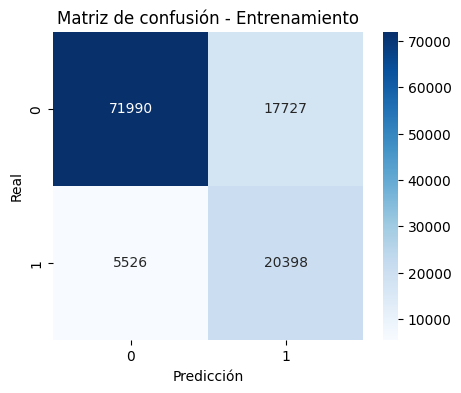

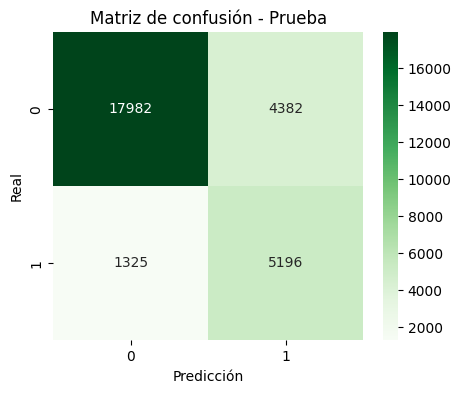

In [495]:
# Graficar matriz de confusión de entrenamiento
plt.figure(figsize=(5,4))
sns.heatmap(confusion_train, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión - Entrenamiento")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Graficar matriz de confusión de prueba
plt.figure(figsize=(5,4))
sns.heatmap(confusion_test, annot=True, fmt="d", cmap="Greens")
plt.title("Matriz de confusión - Prueba")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

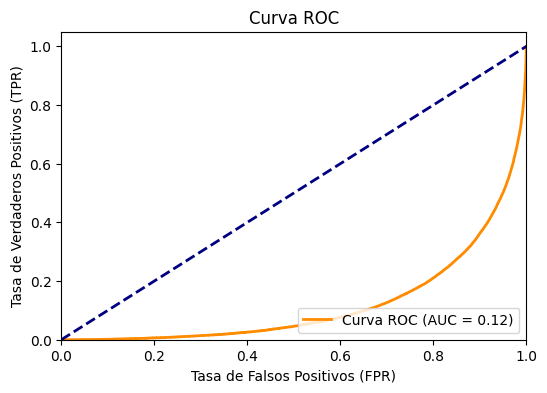

In [496]:
# Obtengo las probabilidades de predicción del modelo
y_probs = modelo.predict_proba(X_train)[:, 0]

# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_train, y_probs)
roc_auc = auc(fpr, tpr)

# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

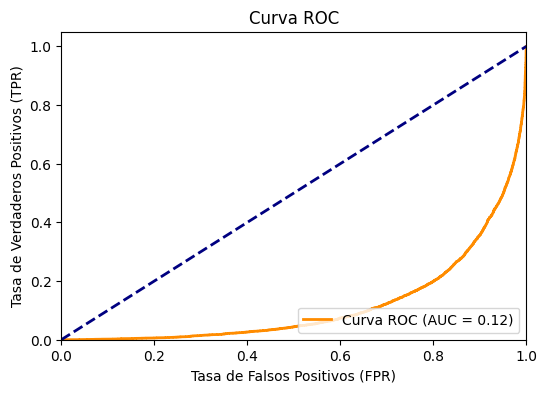

In [497]:
# Obtengo las probabilidades de predicción del modelo
y_probs = modelo.predict_proba(X_test)[:, 0]

# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()